
## Knowing our data

Before starting it's important to load all the libraries we'll be using and understand the data we'll be working on.

In [48]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
line_break = '=================================================================================================================================='
colors = ['lightcoral', 'lightblue', 'lightgreen', 'peachpuff', 'lavender', 'mintcream', 'palegoldenrod', 'thistle', 'lightyellow', 'skyblue', 'lightpink', 'honeydew', 'lavenderblush']


In [52]:
df = pd.read_csv('data/volcanoes.csv')

Take a look at some records of your data, analyze columns and values:

In [53]:
# your code goes here
df.describe()

,Number,Latitude,Longitude,Elevation (Meters)
count,1508.000000,1508.000000,1508.000000,1508.000000
mean,296656.110743,14.083156,23.391469,1683.357427
std,48861.852600,31.871107,113.656588,1571.102885
min,210010.000000,-78.500000,-179.970000,-4200.000000
25%,261157.500000,-7.068750,-78.274250,687.250000
50%,300015.000000,13.861500,38.390000,1464.000000
75%,342123.250000,41.748750,138.578000,2352.250000
max,390847.000000,85.608000,179.580000,6879.000000



## Fixing types

We can see different types of volcanoes but some of them contains `(es)`, `(s)` or `?` at the end.

Use the following Regular Expressions to replace that values with empty strings:

- `r'\((.*)\)'`: selects everything between two parentheses;
- `r'\?'`: selects `?` question mark.

In [54]:
print(df['Type'].unique())
print(line_break)

df['Type'] = df['Type'].str.replace(r'\(s\)', "",regex=True )

df['Type'] = df['Type'].str.replace(r'\(es\)',"", regex=True)

print(df['Type'].unique())
print(line_break)

['Maar(s)' 'Lava dome(s)' 'Pyroclastic cone(s)' 'Explosion crater(s)'
 'Caldera' 'Stratovolcano' 'Complex' 'Submarine' 'Stratovolcano(es)'
 'Shield' 'Shield(s)' 'Caldera(s)' 'Lava dome' 'Lava cone(s)'
 'Volcanic field' 'Volcanic field(s)' 'Fissure vent(s)' 'Fissure vent'
 'Pyroclastic cone' 'Tuff cone(s)' 'Tuff cone' 'Pyroclastic shield'
 'Submarine(es)' 'Maar' 'Compound' 'Lava cone' 'Unknown' 'Stratovolcano?'
 'Crater rows' 'Complex(es)' 'Cone(s)' 'Tuff ring(s)' 'Subglacial']
['Maar' 'Lava dome' 'Pyroclastic cone' 'Explosion crater' 'Caldera'
 'Stratovolcano' 'Complex' 'Submarine' 'Shield' 'Lava cone'
 'Volcanic field' 'Fissure vent' 'Tuff cone' 'Pyroclastic shield'
 'Compound' 'Unknown' 'Stratovolcano?' 'Crater rows' 'Cone' 'Tuff ring'
 'Subglacial']



## Show the amount of volcanoes per type using a bar plot

> Customize it! You can try different bar colors or different bars orientation, etc.

Type
Stratovolcano         718
Shield                164
Submarine             118
Pyroclastic cone      117
Caldera                97
Volcanic field         89
Complex                55
Lava dome              50
Maar                   21
Fissure vent           18
Compound               14
Tuff cone              12
Pyroclastic shield      8
Crater rows             6
Subglacial              6
Stratovolcano?          4
Lava cone               4
Unknown                 3
Explosion crater        2
Cone                    1
Tuff ring               1
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


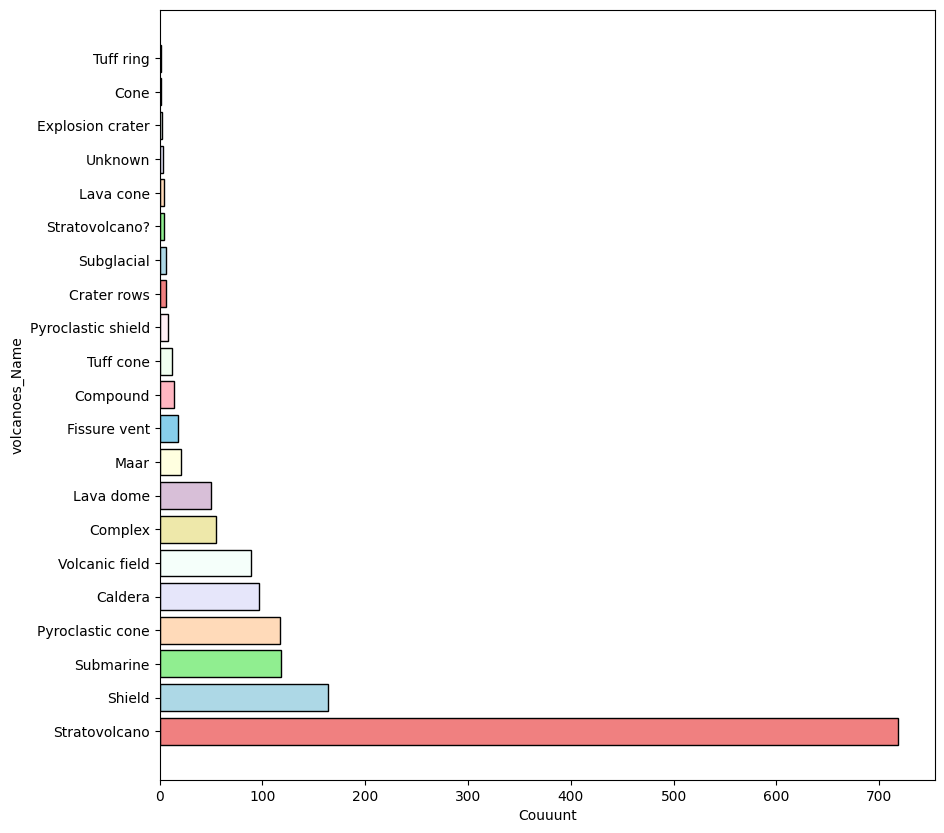

In [55]:
# your code goes here
val_type= df['Type'].value_counts()
print(val_type)

print(line_break)
#val_type = pd.DataFrame(val_type)
print(type(val_type))

print(line_break)
#plt.bar(val_type.index,val_type.values)
plt.figure(figsize=(10, 10)) 
plt.ylabel('volcanoes_Name')
plt.xlabel('Couuunt')
plt.barh(val_type.index, val_type.values, color= colors , edgecolor = 'black')


plt.show()



## Show the top 10 countries with more volcanoes using a bar plot

> Customize it! You can try different bar colors or different bars orientation, etc.


Country
United States       173
Russia              145
Indonesia           139
Japan               112
Chile                76
Papua New Guinea     53
Ethiopia             52
Philippines          50
Mexico               42
Ecuador              35
Name: count, dtype: int64


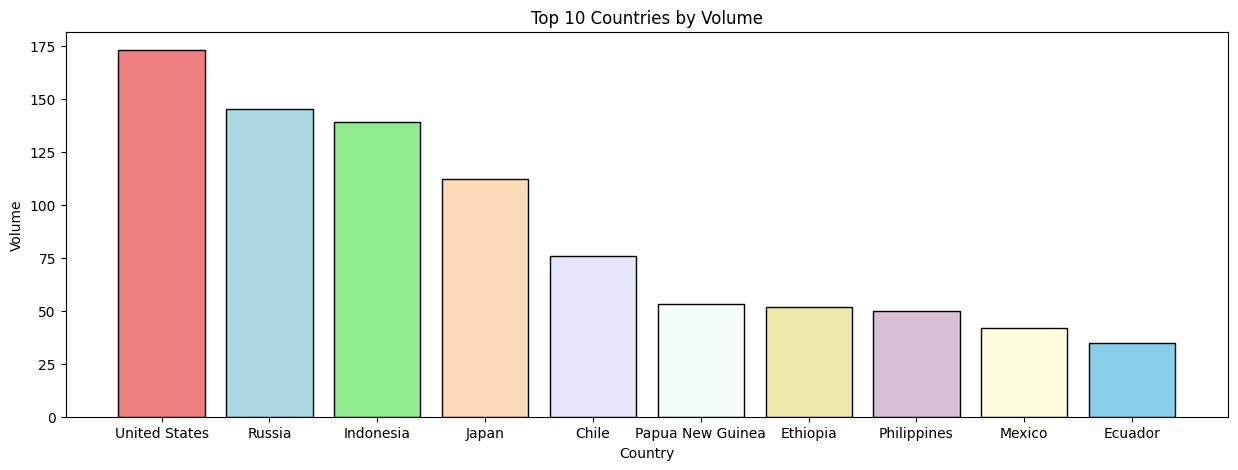

In [56]:
# your code goes here
country_with_vol_top_10 = df['Country'].value_counts().sort_values(ascending=False).head(10)
print(country_with_vol_top_10)
print(line_break)
plt.figure(figsize=(15,5))
plt.bar(country_with_vol_top_10.index,country_with_vol_top_10.values, color =  colors , edgecolor= 'black' )
plt.title('Top 10 Countries by Volume')
plt.xlabel('Country')
plt.ylabel('Volume')


plt.show()



## Show the amount of volcanoes of each tectonic setting using a pie plot


Tectonic Setting
Subduction Zone / Continental Crust (>25 km)       762
Intraplate / Continental Crust (>25 km)            156
Subduction Zone / Oceanic Crust (< 15 km)          132
Rift Zone / Continental Crust (>25 km)             109
Rift Zone / Oceanic Crust (< 15 km)                101
Subduction Zone / Crust Thickness Unknown           83
Subduction Zone / Intermediate Crust (15-25 km)     78
Rift Zone / Intermediate Crust (15-25 km)           43
Intraplate / Oceanic Crust (< 15 km)                31
Intraplate / Intermediate Crust (15-25 km)           5
Name: count, dtype: int64


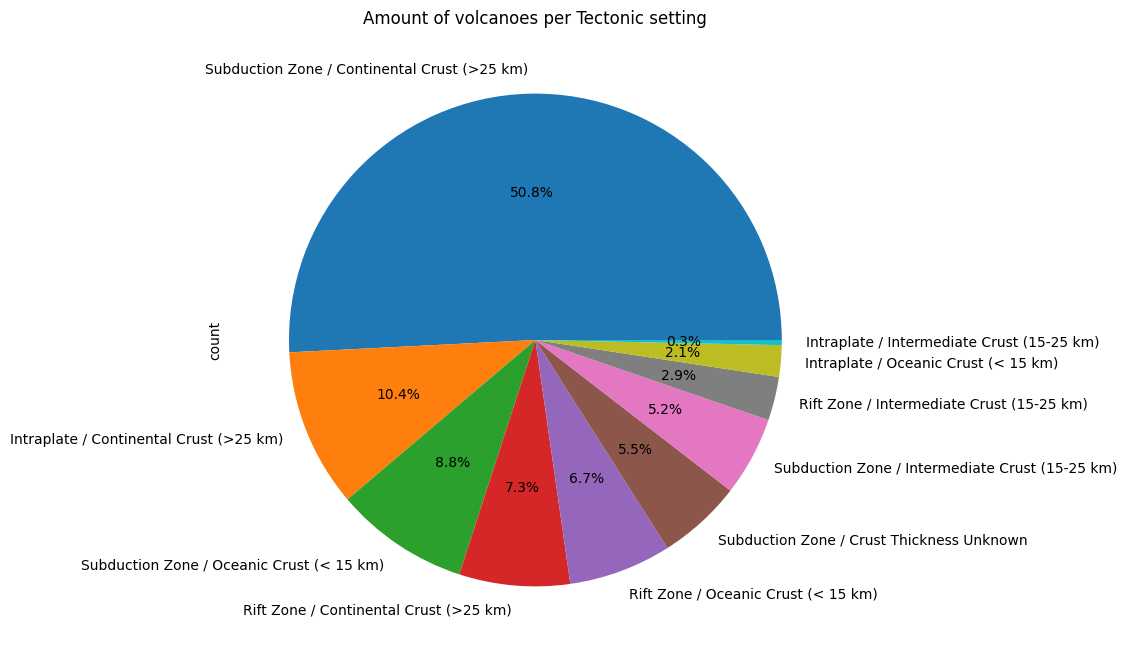

In [57]:
# your code goes here
Tectoni_Setting = df['Tectonic Setting'].value_counts().head(10)
print(Tectoni_Setting)
print(line_break)

Tectoni_Setting.plot(kind='pie'
                    ,figsize=(8,8),                    
                     autopct='%1.1f%%',
                     title='Amount of volcanoes per Tectonic setting',
                     color = colors)


plt.show()



## Analyze volcanoes elevation using a Box plot

Index(['Number', 'Name', 'Country', 'Region', 'Type', 'Activity Evidence',
       'Last Known Eruption', 'Latitude', 'Longitude', 'Elevation (Meters)',
       'Dominant Rock Type', 'Tectonic Setting'],
      dtype='object')


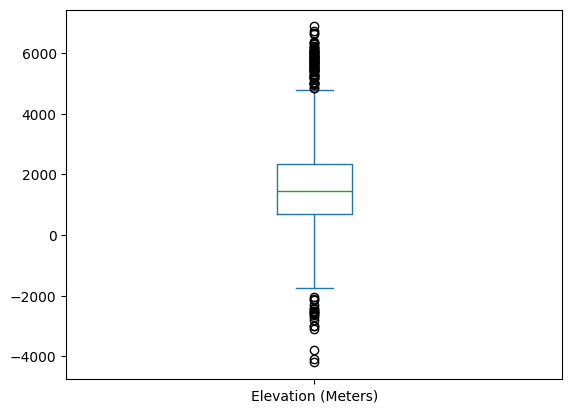

In [58]:
# your code goes here
print(df.columns)
print(line_break)
df['Elevation (Meters)'].plot(kind='box')
plt.show()



## Over or under the sea?

Create a new `Under the sea` column which should have `True` if the volcanoe elevation is less than or equal to 0, `False` otherwise.

In [59]:
# your code goes here

print(df.columns)
#df['Under_the_sea'] = df
df['Under_the_sea'] = df['Elevation (Meters)'] <= 0
df['Under_the_sea'].value_counts()

Index(['Number', 'Name', 'Country', 'Region', 'Type', 'Activity Evidence',
       'Last Known Eruption', 'Latitude', 'Longitude', 'Elevation (Meters)',
       'Dominant Rock Type', 'Tectonic Setting'],
      dtype='object')


Under_the_sea
False    1374
True      134
Name: count, dtype: int64



## Show the amount of undersea volcanoes per Region using a bar plot


Index(['Region', 'Under_the_sea', 'count'], dtype='object')
Index(['Region', 'count'], dtype='object')


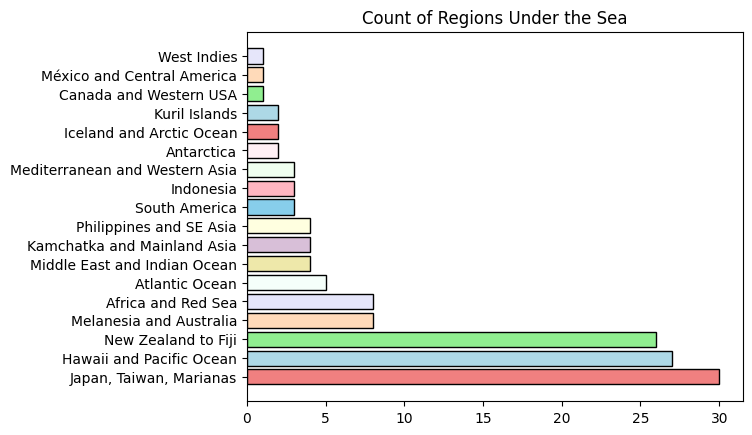

In [60]:
# your code goes here

Region_Region = df[['Region','Under_the_sea']]

Region_Region  = pd.DataFrame(Region_Region.value_counts())
Region_Region.reset_index(inplace=True)
print(Region_Region.columns)
print(line_break)

Region_Region =      Region_Region[Region_Region['Under_the_sea'] == True][['Region','count']]
print(Region_Region.columns)
print(line_break)

plt.barh(Region_Region['Region'], Region_Region['count'], color=colors , edgecolor = 'black')

plt.title('Count of Regions Under the Sea')
plt.show()











## Show the distribution of the elevation of the volcanoes using an histogram

> Customize it! You can try different colors, different bins amount, alpha values, adding KDE, etc.

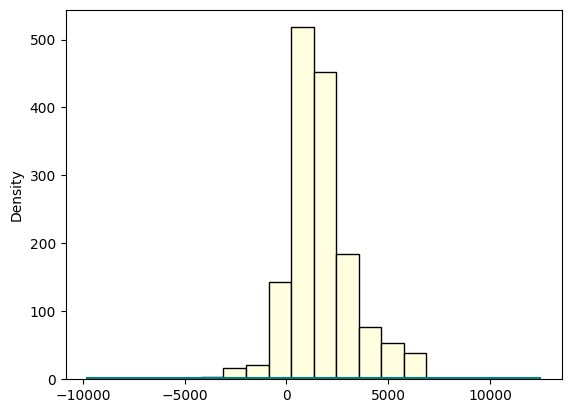

In [61]:


Name_df = df[['Name', 'Elevation (Meters)']].sort_values(by='Elevation (Meters)', ascending=False)

Name_df['Elevation (Meters)'].plot(kind = 'hist',  color = 'lightyellow' , edgecolor = 'black')

Name_df['Elevation (Meters)'].plot(kind='kde',color='teal',linewidth=3)

plt.show()


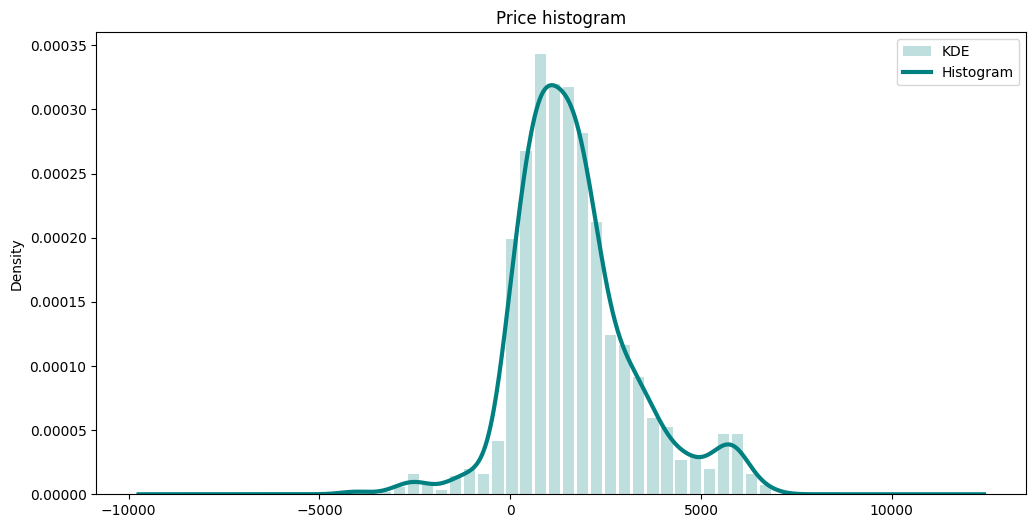

In [62]:
df['Elevation (Meters)'].plot(kind='hist',
                              rwidth=0.8,
                              color="teal",
                              bins=30,
                              density=True,
                             alpha=0.25,
                              title="Price histogram",
                              figsize=(12, 6))

df['Elevation (Meters)'].plot(kind='kde',
                              color='teal',
                              linewidth=3)

plt.legend(['KDE', 'Histogram'])

plt.show()